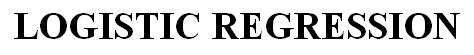

In this notebook we will solve a classification problem using Python programming language. In order to do this we will use some commonly used libraries for solving machine learning tasks, these includes Pandas, Numpy, Matplotlib and Scikit-learn.

Task 1:

The objective of this task is to build a model that predicts whether an individual has Diabetes or not based several medical predictors contained in the dataset/pima.csv file. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. The explanation of the predictor variables is as follows:

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the data
df = pd.read_csv("/Users/user/Desktop/Assignment/Emmerging assignment/ml_101-introduction_to_machine_learning/0x02-logistic_regression/dataset/01-pima-diabetes.csv")
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


DATA EXPROLATION

In [2]:
#First five rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Last five rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
#To check the amount of zeros in a DataFrame
df == 0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,True
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,True
764,False,False,False,False,True,False,False,False,True
765,False,False,False,False,False,False,False,False,True
766,False,False,False,True,True,False,False,False,False


In [5]:
#To summarize the number of zeros in each column.
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [6]:
#To check the total number of zeros in the whole DataFrame
(df == 0).sum().sum()

1263

In [7]:
#To check the null values in each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we saw above there are columns with zeros, not all zeros are accepted in all columns. Example a value of zero in a column of pregnancies may be accepted, because not all women have got pregnant. But a zero in other columns i.e Glucose, BloodPresure and so on may not be accepted because a person who is alive may not have a value of zero of glucose,BloodPressure,SkinThickness and so on. So we must think a way to remove those zeros. And a simplest way is through imputing those values of zeros.

IMPUTATION

In [8]:
#Printing the names of columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

The columns which are to be imputed are all columns except two columns; Pregnancies and Outcome. So let's drop those two columns first, and we shall consider it later.

In [9]:
Outcome = df['Outcome']
Pregnancies = df['Pregnancies']


In [10]:
df_new = df.drop(['Outcome', 'Pregnancies'], axis = 1)
df_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


Replace zeros with numpy value null so as to allow us to use other built-in function to deal with null values.

In [11]:
df_new = df_new.replace(0, np.nan)
df_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63
764,122.0,70.0,27.0,NaN,36.8,0.340,27
765,121.0,72.0,23.0,112.0,26.2,0.245,30
766,126.0,60.0,NaN,NaN,30.1,0.349,47


In [12]:
df_new_columns = df_new.columns
df_new_columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Now Let's impute the null(Nan)

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df_new = imputer.fit_transform(df_new)
df_new

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [14]:
df_new = pd.DataFrame(df_new,columns = df_new_columns)
df_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,125.0,33.6,0.627,50.0
1,85.0,66.0,29.0,125.0,26.6,0.351,31.0
2,183.0,64.0,29.0,125.0,23.3,0.672,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,122.0,70.0,27.0,125.0,36.8,0.340,27.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,126.0,60.0,29.0,125.0,30.1,0.349,47.0


Now let's add the two columns we drop ealier

In [15]:
df_new['Pregnancies'] = Pregnancies
df_new['Outcome'] = Outcome
df_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,6,1
1,85.0,66.0,29.0,125.0,26.6,0.351,31.0,1,0
2,183.0,64.0,29.0,125.0,23.3,0.672,32.0,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10,0
764,122.0,70.0,27.0,125.0,36.8,0.340,27.0,2,0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5,0
766,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1,1


Now we are sure that all data are reasonable.

Let's scale our data, in order all data to be in acceptable range to be used in our logistic regression model which we will create later.

Since we are scaling the columns which are considered as a features, the column which is considered as an output/label are not supposed to be scaled. So in our case the column named Outcome, is not supposed to be scaled so we drop it.

In [16]:
#Then
y = df_new['Outcome']


In [17]:
df_new = df_new.drop('Outcome', axis = 1)
df_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,6
1,85.0,66.0,29.0,125.0,26.6,0.351,31.0,1
2,183.0,64.0,29.0,125.0,23.3,0.672,32.0,8
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10
764,122.0,70.0,27.0,125.0,36.8,0.340,27.0,2
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5
766,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1


In [18]:
columns = df_new.columns
columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Pregnancies'],
      dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_new)
df_scaled = scaler.transform(df_new)
df_scaled = pd.DataFrame(df_scaled, columns = columns)
df_scaled


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,0.639947
1,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,-0.844885
2,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1.233880
3,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,-0.844885
4,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,-1.141852
...,...,...,...,...,...,...,...,...
763,-0.679069,0.298896,2.150354,0.455573,0.064737,-0.908682,2.532136,1.827813
764,0.011301,-0.197433,-0.239949,-0.181541,0.632365,-0.398282,-0.531023,-0.547919
765,-0.021574,-0.031990,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760,0.342981
766,0.142800,-1.024647,-0.012301,-0.181541,-0.342790,-0.371101,1.170732,-0.844885


In [20]:
#Now we may say that
X = df_scaled
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,0.639947
1,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,-0.844885
2,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1.233880
3,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,-0.844885
4,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,-1.141852
...,...,...,...,...,...,...,...,...
763,-0.679069,0.298896,2.150354,0.455573,0.064737,-0.908682,2.532136,1.827813
764,0.011301,-0.197433,-0.239949,-0.181541,0.632365,-0.398282,-0.531023,-0.547919
765,-0.021574,-0.031990,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760,0.342981
766,0.142800,-1.024647,-0.012301,-0.181541,-0.342790,-0.371101,1.170732,-0.844885


In [21]:
#Let us split our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [22]:
#Let's build our Model now
from sklearn.linear_model import LogisticRegression
ls = LogisticRegression()
ls.fit(X, y)

LogisticRegression()

In [23]:
#Let's try to make a prediction by using our X_test
y_pred = ls.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
#Model Evaluation
#For classification we use confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[128,  23],
       [ 31,  49]], dtype=int64)

<module 'seaborn' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

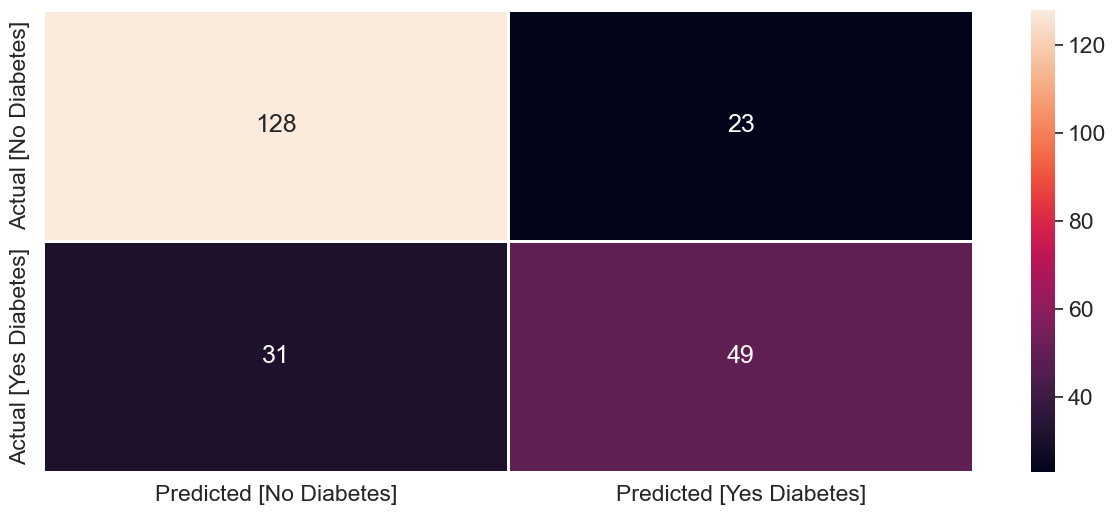

In [25]:
import seaborn as sns
ylabel = ["Actual [No Diabetes]","Actual [Yes Diabetes]"]
xlabel = ["Predicted [No Diabetes]","Predicted [Yes Diabetes]"]
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(confusion_matrix, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1, fmt='g')
sns

In [26]:
#An Alternative
#Model Evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[128,  23],
       [ 31,  49]], dtype=int64)

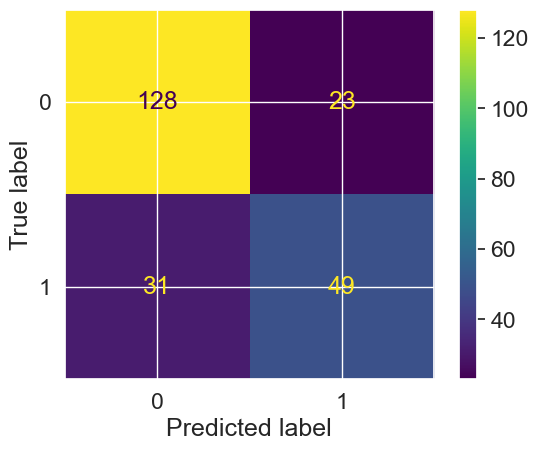

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ls.classes_)
disp.plot()


In [28]:
#A more comprehensive summary of precision, recall and f1-score
#Can be found by using classification_report() 
#A convenience function to compute all at once
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       151
           1       0.68      0.61      0.64        80

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



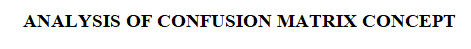

This concept is from probability, a tree method.

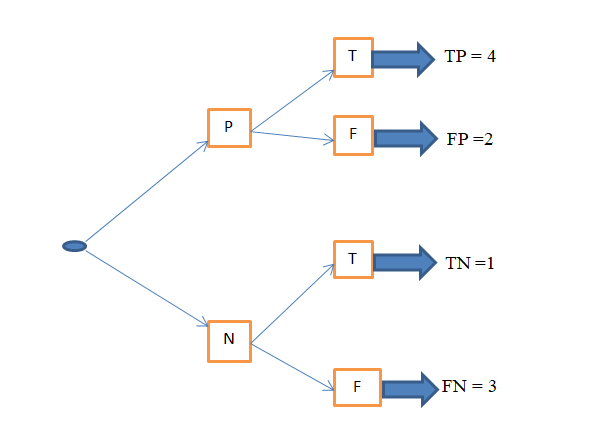

Where;
P = Positive,
N = Negative,
T = True,
F = False,

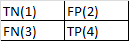

From probability concept

-Total true/Correct predicted value are given by:
= TP + TN

-Total False predicted value are given by:
= FP + FN

ACCURACY

Refer as the number of correct predictions divided by the number of all sample

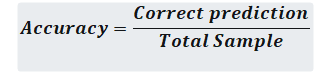

So to use this formular, understand first what are the correct predictions have been made, then divide by all possible events/Samples. Therefore;

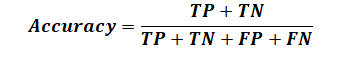

PRECISION(POSITIVE PREDICTIVE VALUE)

Refer as the measure of how many of the sample predicted as positive are actually positive

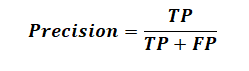

RECALL

Refer as a measure of how many of the positive sample are captured by a positive prediction

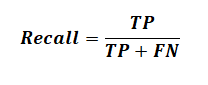

SUMMARY

A summary to recall and precision is to find a f-score or f-measure

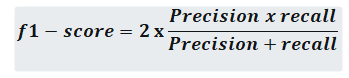

We can try to make predictions for a new observation

In [29]:
#Columns which are to be used for user input
columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Pregnancies'],
      dtype='object')

In [30]:
#User input
data ={'Glucose': [20],
    'BloodPressure': [30],
    'SkinThickness': [6], 
    'Insulin':[6], 
    'BMI':[6],
    'DiabetesPedigreeFunction': [8], 
    'Age':[50], 
    'Pregnancies':[9]}

data = pd.DataFrame(data)
data = scaler.transform(data)
data = pd.DataFrame(data, columns = columns)
data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,-3.341926,-3.506291,-2.630253,-1.560024,-3.850439,22.735827,1.425995,1.530847


In [31]:
#Let's use our model for prediction
ls.predict(data)

array([1], dtype=int64)

In [32]:
#Saving the model
#Using pickel library
#For small datasets and small task
import pickle

#Create an iterator object with write permission
#a file i.e is called logistic_model.pkl

with open('logistic_model','wb') as files:
    pickle.dump(ls, files)



In [33]:
#Load a saved model and use it for prediction
with open('/Users/user/Desktop/Assignment/logistic_model','rb') as f:
    ls_pickle = pickle.load(f)


In [34]:
#Alternative to save the model
#Using Joblib
#It save a model in a way can operate on objects with large Numpy arrays/data as a backend with many parameters
import joblib
#Saving the model
joblib.dump(ls,'logistic_model_joblib')


['logistic_model_joblib']

In [35]:
#Loading a saved joblib file and make the prediction
ls_joblib = joblib.load('/Users/user/Desktop/Assignment/logistic_model_joblib')

In [36]:
#A class for making Diabetes Prediction
class DiabetesPredictor:
    def UserInput(self):
        Glucose = float(input("Enter a value for glucose: "))
        BloodPressure = float(input("Enter a value for Blood Pressure: "))
        SkinThickness = float(input("Enter a value for Skin Thickness: "))
        Insulin = float(input("Enter a value for insulin: "))
        BMI = float(input("Enter a value for BMI: "))
        DiabetesPedigreeFunction = float(input("Enter a value for Diabetes Pedigree Function: "))
        Age = int(input("Enter your age: "))
        Pregnancies = int(input("How many times have been pregnanted: "))
        #Then save all User input to a dictionary
        self.data ={'Glucose': [Glucose],
                    'BloodPressure': [BloodPressure],
                    'SkinThickness': [SkinThickness], 
                    'Insulin':[Insulin], 
                    'BMI':[BMI],
                    'DiabetesPedigreeFunction': [DiabetesPedigreeFunction], 
                    'Age':[Age], 
                    'Pregnancies':[Pregnancies]
                   }
        
        
    def make_prediction(self):
        self.data = pd.DataFrame(self.data)
        self.data = scaler.transform(self.data)
        self.data = pd.DataFrame(self.data, columns = columns)
        #Here we use all method described above to compare the result of each saved model
        #But in application, only one method can be used.
        normal_model = ls.predict(self.data)
        pickle_model = ls_pickle.predict(self.data)
        joblib_model = ls_joblib.predict(self.data)
        return 'Normal model class predicted is: {}\npickel model class predicted is: {}\njoblib model class predicted is: {}'.format(normal_model, pickle_model, joblib_model)

#Instance of a class
n = DiabetesPredictor()
n.UserInput()
print(n.make_prediction())

Enter a value for glucose: 23
Enter a value for Blood Pressure: 45
Enter a value for Skin Thickness: 45
Enter a value for insulin: 65
Enter a value for BMI: 67
Enter a value for Diabetes Pedigree Function: 56
Enter your age: 8
How many times have been pregnanted: 65
Normal model class predicted is: [1]
pickel model class predicted is: [1]
joblib model class predicted is: [1]
